<a href="https://colab.research.google.com/github/ES-Mohamed609/MNIST-dataset-DNN-Model/blob/main/MNIST_dataset_DNN_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, optimizers, datasets
import numpy as np
import matplotlib.pyplot as plt
import os

#Load MNIST dataset

In [2]:
(x_train_raw, y_train_raw), (x_test_raw, y_test_raw) = datasets.mnist.load_data()
print("Training data shape:", x_train_raw.shape, y_train_raw.shape)
print("Test data shape:", x_test_raw.shape, y_test_raw.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Training data shape: (60000, 28, 28) (60000,)
Test data shape: (10000, 28, 28) (10000,)


# Convert labels to one-hot encoding

In [3]:
num_classes = 10
y_train = tf.keras.utils.to_categorical(y_train_raw, num_classes)
y_test = tf.keras.utils.to_categorical(y_test_raw, num_classes)

# Data visualization

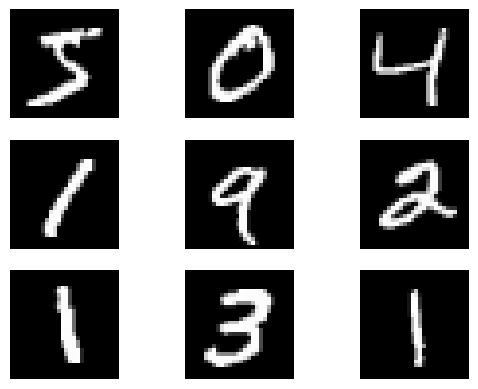

In [4]:
plt.figure()
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_train_raw[i], cmap='gray')
    plt.axis('off')
plt.show()

# Data preprocessing

In [6]:
x_train = x_train_raw.reshape(60000, 784).astype('float32') / 255
x_test = x_test_raw.reshape(10000, 784).astype('float32') / 255


# Build DNN model

In [7]:
model = tf.keras.Sequential([
    layers.Dense(512, activation='relu', input_dim=784),
    layers.Dense(256, activation='relu'),
    layers.Dense(124, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 124)            │        31,868 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,250 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 566,366 (2.16 MB)

 Trainable params: 566,366 (2.16 MB)

 Non-trainable params: 0 (0.00 B)

# Compile and train DNN model

In [8]:
model.compile(optimizer=optimizers.Adam(0.001),
              loss=tf.keras.losses.categorical_crossentropy,
              metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=128, epochs=10, verbose=1)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.8740 - loss: 0.4297
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.9732 - loss: 0.0852
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.9831 - loss: 0.0525
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9870 - loss: 0.0407
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.9897 - loss: 0.0315
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.9921 - loss: 0.0247
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 0.9938 - loss: 0.0181
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.9938 - loss: 0.0196
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.9958 - loss: 0.0130
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 0.9942 - loss: 0.0184


# Evaluate DNN model

In [9]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.08280780166387558
Test accuracy: 0.9805999994277954


# Save DNN model

In [11]:
logdir = './mnist_model'
if not os.path.exists(logdir):
    os.mkdir(logdir)
model.save(logdir + '/final_DNN_model.h5')